In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [7]:
url = "http://books.toscrape.com/"
response = requests.get(url)
soup =BeautifulSoup(response.content, "html.parser")

In [10]:
books_html = soup.find_all("article", class_="product_pod")

## Parsing _one_ book

In [22]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [33]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])
book_price

51.77

In [34]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [37]:
book_rating = book_stars_html.attrs['class'][1]

In [38]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [43]:
def parse_rating(rating_classes):
    """Look at `rating_classes` and return the right rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]"""
    rating = rating_classes[1]
    rating_list = ['One', 'Two', 'Three', 'Four', 'Five']
    if rating in rating_list:
        for index, number in enumerate(rating_list):
            if rating == number:
                return index + 1
    else: 
        print('this is not a rating')
        return None


In [47]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])

## Parsing _all_ books

In [54]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for book in books_html:
    books_dict['Title'].append(book.find("h3").find("a").attrs["title"])
    books_dict['Price'].append(float(book.find("p", class_="price_color").string[1:]))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))

# Loading data in Pandas


In [59]:
books_df = pd.DataFrame.from_dict(books_dict)

<AxesSubplot:xlabel='Rating'>

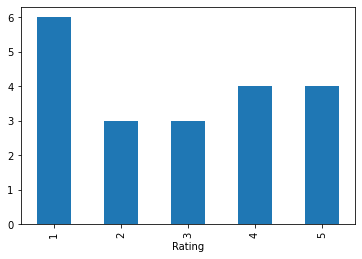

In [61]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

# Going through all the pages of the catalogue


In [71]:
MAX_PAGE = 3
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup =BeautifulSoup(response.content, "html.parser")
    books_html = soup.find_all("article", class_="product_pod")

    for book in books_html:
        books_dict['Title'].append(book.find("h3").find("a").attrs["title"])
        books_dict['Price'].append(float(book.find("p", class_="price_color").string[1:]))
        books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
print("Done!")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Done!


In [72]:
all_books_df = pd.DataFrame.from_dict(books_dict)

<AxesSubplot:>

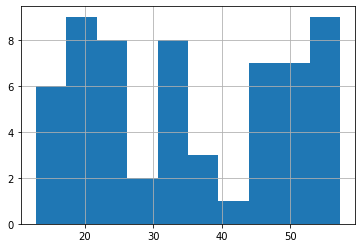

In [73]:
all_books_df["Price"].hist()

<AxesSubplot:xlabel='Rating'>

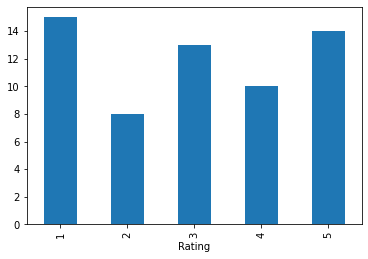

In [74]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [75]:
all_books_df.to_csv("books.csv")